In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

/Users/elizabethbolin/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  


In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.  
results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()

print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [5]:
# 2. Convert the June temperatures to a list.
June_temps = list(np.ravel(results))
print(June_temps)

['2010-06-01', '78.0', '2010-06-02', '76.0', '2010-06-03', '78.0', '2010-06-04', '76.0', '2010-06-05', '77.0', '2010-06-06', '78.0', '2010-06-07', '77.0', '2010-06-08', '78.0', '2010-06-09', '78.0', '2010-06-10', '79.0', '2010-06-11', '78.0', '2010-06-12', '78.0', '2010-06-13', '78.0', '2010-06-14', '77.0', '2010-06-15', '78.0', '2010-06-16', '78.0', '2010-06-17', '77.0', '2010-06-18', '77.0', '2010-06-19', '82.0', '2010-06-20', '78.0', '2010-06-21', '78.0', '2010-06-22', '78.0', '2010-06-23', '78.0', '2010-06-24', '78.0', '2010-06-25', '77.0', '2010-06-26', '76.0', '2010-06-27', '78.0', '2010-06-28', '78.0', '2010-06-29', '78.0', '2010-06-30', '78.0', '2011-06-01', '77.0', '2011-06-02', '78.0', '2011-06-03', '73.0', '2011-06-04', '70.0', '2011-06-05', '76.0', '2011-06-06', '77.0', '2011-06-07', '77.0', '2011-06-08', '77.0', '2011-06-09', '77.0', '2011-06-10', '78.0', '2011-06-11', '77.0', '2011-06-12', '77.0', '2011-06-13', '78.0', '2011-06-14', '78.0', '2011-06-15', '77.0', '2011-06-

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

June_df = pd.DataFrame(results, columns=['date', 'temperature'])
June_df.set_index(June_df['date'], inplace = True)
print(June_df.to_string(index=False))

      date  temperature
2010-06-01         78.0
2010-06-02         76.0
2010-06-03         78.0
2010-06-04         76.0
2010-06-05         77.0
2010-06-06         78.0
2010-06-07         77.0
2010-06-08         78.0
2010-06-09         78.0
2010-06-10         79.0
2010-06-11         78.0
2010-06-12         78.0
2010-06-13         78.0
2010-06-14         77.0
2010-06-15         78.0
2010-06-16         78.0
2010-06-17         77.0
2010-06-18         77.0
2010-06-19         82.0
2010-06-20         78.0
2010-06-21         78.0
2010-06-22         78.0
2010-06-23         78.0
2010-06-24         78.0
2010-06-25         77.0
2010-06-26         76.0
2010-06-27         78.0
2010-06-28         78.0
2010-06-29         78.0
2010-06-30         78.0
2011-06-01         77.0
2011-06-02         78.0
2011-06-03         73.0
2011-06-04         70.0
2011-06-05         76.0
2011-06-06         77.0
2011-06-07         77.0
2011-06-08         77.0
2011-06-09         77.0
2011-06-10         78.0
2011-06-11      

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12).all()

print(Dec_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [10]:
# 7. Convert the December temperatures to a list.
Dec_temps = list(np.ravel(Dec_results))
print(Dec_temps)

['2010-12-01', '76.0', '2010-12-03', '74.0', '2010-12-04', '74.0', '2010-12-06', '64.0', '2010-12-07', '64.0', '2010-12-08', '67.0', '2010-12-09', '77.0', '2010-12-10', '66.0', '2010-12-11', '69.0', '2010-12-12', '68.0', '2010-12-13', '68.0', '2010-12-14', '71.0', '2010-12-15', '74.0', '2010-12-16', '67.0', '2010-12-17', '66.0', '2010-12-18', '69.0', '2010-12-19', '71.0', '2010-12-23', '70.0', '2010-12-24', '70.0', '2010-12-26', '74.0', '2010-12-27', '74.0', '2010-12-28', '71.0', '2010-12-29', '75.0', '2010-12-30', '75.0', '2010-12-31', '72.0', '2011-12-01', '69.0', '2011-12-02', '68.0', '2011-12-03', '73.0', '2011-12-04', '74.0', '2011-12-05', '73.0', '2011-12-06', '73.0', '2011-12-07', '73.0', '2011-12-08', '73.0', '2011-12-09', '71.0', '2011-12-10', '73.0', '2011-12-11', '73.0', '2011-12-12', '77.0', '2011-12-13', '72.0', '2011-12-14', '71.0', '2011-12-15', '73.0', '2011-12-16', '70.0', '2011-12-17', '73.0', '2011-12-18', '69.0', '2011-12-19', '74.0', '2011-12-20', '72.0', '2011-12-

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_df = pd.DataFrame(Dec_results, columns=['date', 'temperature'])
Dec_df.set_index(Dec_df['date'], inplace = True)
print(Dec_df.to_string(index=False))

      date  temperature
2010-12-01         76.0
2010-12-03         74.0
2010-12-04         74.0
2010-12-06         64.0
2010-12-07         64.0
2010-12-08         67.0
2010-12-09         77.0
2010-12-10         66.0
2010-12-11         69.0
2010-12-12         68.0
2010-12-13         68.0
2010-12-14         71.0
2010-12-15         74.0
2010-12-16         67.0
2010-12-17         66.0
2010-12-18         69.0
2010-12-19         71.0
2010-12-23         70.0
2010-12-24         70.0
2010-12-26         74.0
2010-12-27         74.0
2010-12-28         71.0
2010-12-29         75.0
2010-12-30         75.0
2010-12-31         72.0
2011-12-01         69.0
2011-12-02         68.0
2011-12-03         73.0
2011-12-04         74.0
2011-12-05         73.0
2011-12-06         73.0
2011-12-07         73.0
2011-12-08         73.0
2011-12-09         71.0
2011-12-10         73.0
2011-12-11         73.0
2011-12-12         77.0
2011-12-13         72.0
2011-12-14         71.0
2011-12-15         73.0
2011-12-16      

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

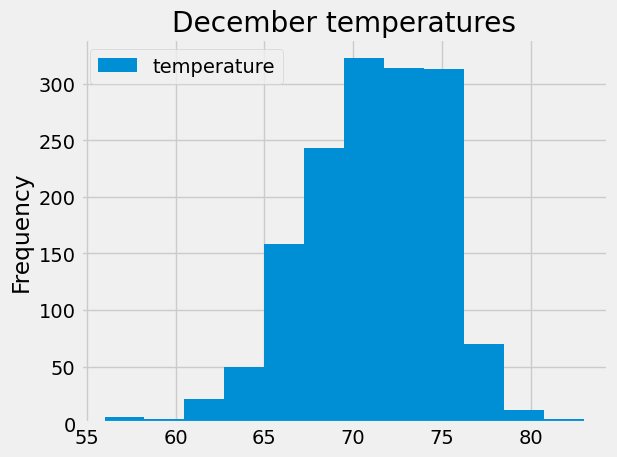

In [15]:
Dec_df.plot.hist(bins=12, title="December temperatures", xlabel="temperature")
plt.tight_layout()


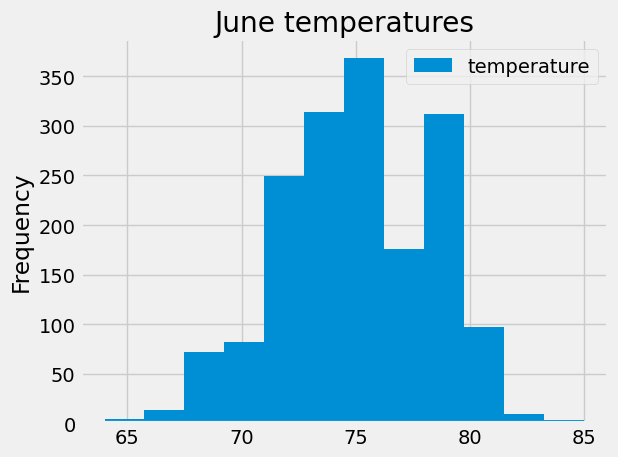

In [16]:
June_df.plot.hist(bins=12, title="June temperatures", xlabel="temperature")
plt.tight_layout()


In [28]:
# Challenge BONUS for README
# Additional query getting June precipitation totals
Prcp_results = []
Prcp_results = session.query(Measurement.date, Measurement.prcp).\
        filter(extract('month', Measurement.date) == 6).all()

print(Prcp_results)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [29]:
# Convert to list
June_precipitation = list(np.ravel(Prcp_results))
print(June_precipitation)

['2010-06-01', 0.0, '2010-06-02', 0.01, '2010-06-03', 0.0, '2010-06-04', 0.0, '2010-06-05', 0.0, '2010-06-06', 0.0, '2010-06-07', 0.0, '2010-06-08', 0.0, '2010-06-09', 0.0, '2010-06-10', 0.0, '2010-06-11', 0.0, '2010-06-12', 0.0, '2010-06-13', 0.0, '2010-06-14', 0.0, '2010-06-15', 0.0, '2010-06-16', 0.0, '2010-06-17', 0.0, '2010-06-18', 0.0, '2010-06-19', 0.0, '2010-06-20', 0.0, '2010-06-21', 0.0, '2010-06-22', 0.0, '2010-06-23', 0.0, '2010-06-24', 0.0, '2010-06-25', 0.0, '2010-06-26', 0.02, '2010-06-27', 0.0, '2010-06-28', 0.0, '2010-06-29', 0.0, '2010-06-30', 0.0, '2011-06-01', 0.07, '2011-06-02', 0.0, '2011-06-03', 0.56, '2011-06-04', 0.89, '2011-06-05', 0.0, '2011-06-06', 0.0, '2011-06-07', 0.0, '2011-06-08', 0.03, '2011-06-09', 0.01, '2011-06-10', 0.0, '2011-06-11', 0.0, '2011-06-12', 0.0, '2011-06-13', 0.0, '2011-06-14', 0.0, '2011-06-15', 0.0, '2011-06-17', 0.0, '2011-06-18', 0.0, '2011-06-19', 0.05, '2011-06-20', 0.06, '2011-06-21', 0.07, '2011-06-24', None, '2011-06-25', 0.0, 

In [30]:
# Put June precipitation data into DataFrame
June_prcp_df = pd.DataFrame(Prcp_results, columns=['date', 'precipitation'])
June_prcp_df.set_index(June_prcp_df['date'], inplace = True)
print(June_prcp_df.to_string(index=False))

      date  precipitation
2010-06-01           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-06           0.00
2010-06-07           0.00
2010-06-08           0.00
2010-06-09           0.00
2010-06-10           0.00
2010-06-11           0.00
2010-06-12           0.00
2010-06-13           0.00
2010-06-14           0.00
2010-06-15           0.00
2010-06-16           0.00
2010-06-17           0.00
2010-06-18           0.00
2010-06-19           0.00
2010-06-20           0.00
2010-06-21           0.00
2010-06-22           0.00
2010-06-23           0.00
2010-06-24           0.00
2010-06-25           0.00
2010-06-26           0.02
2010-06-27           0.00
2010-06-28           0.00
2010-06-29           0.00
2010-06-30           0.00
2011-06-01           0.07
2011-06-02           0.00
2011-06-03           0.56
2011-06-04           0.89
2011-06-05           0.00
2011-06-06           0.00
2011-06-07           0.00
2011-06-08  

In [31]:
June_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [32]:
# Refactor the June query for December precipitation totals
Dec_Prcp_results = []
Dec_Prcp_results = session.query(Measurement.date, Measurement.prcp).\
        filter(extract('month', Measurement.date) == 12).all()

print(Dec_Prcp_results)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [33]:
# Convert to list
Dec_precipitation = list(np.ravel(Dec_Prcp_results))
print(Dec_precipitation)

['2010-12-01', 0.04, '2010-12-03', 0.0, '2010-12-04', 0.0, '2010-12-06', 0.0, '2010-12-07', 0.0, '2010-12-08', 0.0, '2010-12-09', 0.0, '2010-12-10', 1.58, '2010-12-11', 0.77, '2010-12-12', 0.0, '2010-12-13', 0.0, '2010-12-14', 0.0, '2010-12-15', 0.0, '2010-12-16', 0.0, '2010-12-17', 0.0, '2010-12-18', 0.0, '2010-12-19', 1.4, '2010-12-23', 0.0, '2010-12-24', 0.0, '2010-12-26', None, '2010-12-27', 0.13, '2010-12-28', 0.55, '2010-12-29', 0.06, '2010-12-30', 0.01, '2010-12-31', 0.0, '2011-12-01', 0.03, '2011-12-02', 0.08, '2011-12-03', 0.0, '2011-12-04', 0.0, '2011-12-05', 0.0, '2011-12-06', 0.0, '2011-12-07', 0.0, '2011-12-08', 0.0, '2011-12-09', 0.13, '2011-12-10', 0.07, '2011-12-11', 0.07, '2011-12-12', 0.08, '2011-12-13', 0.4, '2011-12-14', 0.7, '2011-12-15', 0.0, '2011-12-16', 0.01, '2011-12-17', 0.07, '2011-12-18', 0.02, '2011-12-19', 0.15, '2011-12-20', 0.02, '2011-12-21', 0.18, '2011-12-22', 0.03, '2011-12-23', 0.04, '2011-12-24', 0.1, '2011-12-25', 0.03, '2011-12-26', 0.0, '2011-1

In [34]:
# Put December precipitation data into DataFrame
Dec_prcp_df = pd.DataFrame(Dec_Prcp_results, columns=['date', 'precipitation'])
Dec_prcp_df.set_index(Dec_prcp_df['date'], inplace = True)
print(Dec_prcp_df.to_string(index=False))

      date  precipitation
2010-12-01           0.04
2010-12-03           0.00
2010-12-04           0.00
2010-12-06           0.00
2010-12-07           0.00
2010-12-08           0.00
2010-12-09           0.00
2010-12-10           1.58
2010-12-11           0.77
2010-12-12           0.00
2010-12-13           0.00
2010-12-14           0.00
2010-12-15           0.00
2010-12-16           0.00
2010-12-17           0.00
2010-12-18           0.00
2010-12-19           1.40
2010-12-23           0.00
2010-12-24           0.00
2010-12-26            NaN
2010-12-27           0.13
2010-12-28           0.55
2010-12-29           0.06
2010-12-30           0.01
2010-12-31           0.00
2011-12-01           0.03
2011-12-02           0.08
2011-12-03           0.00
2011-12-04           0.00
2011-12-05           0.00
2011-12-06           0.00
2011-12-07           0.00
2011-12-08           0.00
2011-12-09           0.13
2011-12-10           0.07
2011-12-11           0.07
2011-12-12           0.08
2011-12-13  

In [35]:
# Get summary statistics for December precipitation
Dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
